In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy.integrate import quad
import numpy as np
import corner
import emcee

In [180]:
N =1000
z =np.linspace(0,5,N) 
z

array([0.        , 0.00500501, 0.01001001, 0.01501502, 0.02002002,
       0.02502503, 0.03003003, 0.03503504, 0.04004004, 0.04504505,
       0.05005005, 0.05505506, 0.06006006, 0.06506507, 0.07007007,
       0.07507508, 0.08008008, 0.08508509, 0.09009009, 0.0950951 ,
       0.1001001 , 0.10510511, 0.11011011, 0.11511512, 0.12012012,
       0.12512513, 0.13013013, 0.13513514, 0.14014014, 0.14514515,
       0.15015015, 0.15515516, 0.16016016, 0.16516517, 0.17017017,
       0.17517518, 0.18018018, 0.18518519, 0.19019019, 0.1951952 ,
       0.2002002 , 0.20520521, 0.21021021, 0.21521522, 0.22022022,
       0.22522523, 0.23023023, 0.23523524, 0.24024024, 0.24524525,
       0.25025025, 0.25525526, 0.26026026, 0.26526527, 0.27027027,
       0.27527528, 0.28028028, 0.28528529, 0.29029029, 0.2952953 ,
       0.3003003 , 0.30530531, 0.31031031, 0.31531532, 0.32032032,
       0.32532533, 0.33033033, 0.33533534, 0.34034034, 0.34534535,
       0.35035035, 0.35535536, 0.36036036, 0.36536537, 0.37037

In [181]:
def R(z):
    if z <= 1.:
        return 1+2*z
    if z>1 and z<5:
        return (3./4.)*(5 - z)
    if z>=5:
        return 0.0
R(3.6)

1.0499999999999998

In [182]:

# valores em Hz^-1
MPC = 1.0293*10**(14)
M_solar = 4.92535*10**(-6)

In [183]:
h = 0.6793
# Em Hz
H0 = (h/3000.)*MPC**(-1.)
H0

2.1998769390200457e-18

In [184]:
Om_mat = 0.3045
w0 = -1.06
lamb1 = 0.00007273
def DC(zz):

        E = lambda zz :  np.sqrt((w0/(w0+lamb1)*Om_mat)*(1+zz)**(3*(1-lamb1)) + (1-(w0/(w0+lamb1))*Om_mat)*(1+zz)**(3*(1+w0)) )**(-1)

        result = quad(E, 0, zz)[0]
        return result

In [185]:
def E(z): 
    return np.sqrt((w0/(w0+lamb1)*Om_mat)*(1+z)**(3*(1-lamb1)) + (1-(w0/(w0+lamb1))*Om_mat)*(1+z)**(3*(1+w0)) )
 
E(2.4)

3.538880162787677

In [186]:
def Psquare(z):
    return (4.*np.pi*(DC(z))**(2)*R(z)*(1+z)**(-1)*E(z)**(-1))**(2)
Psquare(2.2)

17.46291751961486

In [187]:
Norm = quad(Psquare,0,5)[0]
(1./np.sqrt(Norm))

0.12662843804464943

In [188]:
def P(z):
    return (1./np.sqrt(Norm))*(4.*np.pi*(DC(z))**(2)*R(z)*(1+z)**(-1)*E(z)**(-1))
P(2.1)

0.5629509464992067

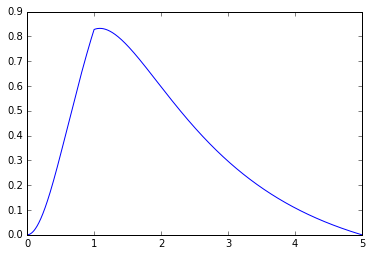

In [189]:
P = (1./np.sqrt(Norm))*np.array([(4.*np.pi*(DC(Z))**(2)*R(Z))*(1+Z)**(-1)*E(Z)**(-1) for Z in z])
plt.plot(z, P)
plt.show()

In [190]:
def P_CDF(z):
    P = lambda z: (1./np.sqrt(Norm))*(4.*np.pi*(DC(z))**(2)*R(z)*(1+z)**(-1)*E(z)**(-1))
    result = quad(P, 0, z)[0]
    return result

P_CDF(4.7)

1.775495161269199

In [191]:
def P_CDFSquare(z):
    PSquare = lambda z: (1./np.sqrt(Norm))*(4.*np.pi*(DC(z))**(2)*R(z)*(1+z)**(-1)*E(z)**(-1))**(2)
    result = quad(PSquare, 0, z)[0]
    return result

P_CDFSquare(4.7)

7.896588378900087

In [192]:
Norm_CDF = quad(P_CDFSquare,0,5)[0]
Norm_CDF

26.894339592858728

In [193]:
from scipy import interpolate

In [194]:
CDF_P = np.vectorize(P_CDF)
CDF_P(z)

array([0.00000000e+00, 6.65526272e-08, 5.32795625e-07, 1.79934299e-06,
       4.26760452e-06, 8.33955869e-06, 1.44175318e-05, 2.29039835e-05,
       3.42012982e-05, 4.87115827e-05, 6.68364697e-05, 8.89769273e-05,
       1.15533074e-04, 1.46904000e-04, 1.83487593e-04, 2.25680371e-04,
       2.73877320e-04, 3.28471733e-04, 3.89855066e-04, 4.58416783e-04,
       5.34544219e-04, 6.18622442e-04, 7.11034122e-04, 8.12159402e-04,
       9.22375780e-04, 1.04205799e-03, 1.17157788e-03, 1.31130432e-03,
       1.46160310e-03, 1.62283679e-03, 1.79536472e-03, 1.97954279e-03,
       2.17572350e-03, 2.38425574e-03, 2.60548484e-03, 2.83975238e-03,
       3.08739619e-03, 3.34875028e-03, 3.62414472e-03, 3.91390566e-03,
       4.21835520e-03, 4.53781138e-03, 4.87258812e-03, 5.22299518e-03,
       5.58933809e-03, 5.97191814e-03, 6.37103233e-03, 6.78697333e-03,
       7.22002946e-03, 7.67048467e-03, 8.13861846e-03, 8.62470595e-03,
       9.12901777e-03, 9.65182009e-03, 1.01933746e-02, 1.07539384e-02,
      

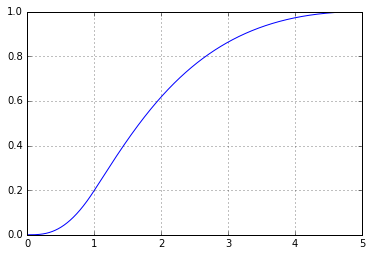

In [195]:
plt.plot(z, (1/np.amax(CDF_P(z)))*CDF_P(z))
plt.grid(True)
plt.show()

In [196]:
CDF_rand = np.sort(np.random.uniform(0,1, N))
CDF_rand

array([5.44813712e-05, 1.19520782e-04, 2.57633269e-03, 2.89311395e-03,
       4.87782114e-03, 5.09784608e-03, 5.21339354e-03, 7.58829191e-03,
       9.39755975e-03, 1.01651619e-02, 1.13627323e-02, 1.15525887e-02,
       1.42070277e-02, 1.56405870e-02, 1.74586315e-02, 1.75998205e-02,
       1.78088709e-02, 1.83736559e-02, 2.21945115e-02, 2.22261297e-02,
       2.27127487e-02, 2.37746146e-02, 2.38621981e-02, 2.49759397e-02,
       2.65351954e-02, 2.69120640e-02, 2.80648083e-02, 2.85506768e-02,
       2.92146660e-02, 2.92451659e-02, 3.04140015e-02, 3.05987834e-02,
       3.06828965e-02, 3.08899918e-02, 3.44218281e-02, 3.50716897e-02,
       3.53558339e-02, 3.69651894e-02, 3.75895579e-02, 3.76001099e-02,
       3.81495786e-02, 3.88050207e-02, 3.88879731e-02, 3.91877841e-02,
       4.05692053e-02, 4.20132523e-02, 4.20652792e-02, 4.46130533e-02,
       5.00912827e-02, 5.01065499e-02, 5.01321272e-02, 5.33613855e-02,
       5.45494159e-02, 5.54928117e-02, 5.65021907e-02, 5.77929850e-02,
      

In [197]:
z_fid = np.interp(CDF_rand, (1/np.amax(CDF_P(z)))*CDF_P(z),z)
z_fid

array([0.05655622, 0.07353181, 0.20589908, 0.21414248, 0.25579806,
       0.25968351, 0.26167221, 0.29765641, 0.32049731, 0.3293342 ,
       0.34233067, 0.34431712, 0.37013166, 0.38282716, 0.39795388,
       0.39909055, 0.40076559, 0.40521547, 0.43331969, 0.43354005,
       0.43690284, 0.44409113, 0.44467851, 0.45199402, 0.46192152,
       0.46426957, 0.47133114, 0.47425345, 0.47819968, 0.47837998,
       0.48520867, 0.48626935, 0.48675008, 0.48793369, 0.50748457,
       0.51095842, 0.51245675, 0.52085471, 0.52404752, 0.52410148,
       0.52689057, 0.53019221, 0.53060889, 0.53209685, 0.53890312,
       0.54588285, 0.54613009, 0.55809437, 0.58257733, 0.5826433 ,
       0.58275383, 0.59647963, 0.60141103, 0.60528655, 0.60938643,
       0.614576  , 0.62162298, 0.62366296, 0.62385513, 0.62857566,
       0.63466848, 0.6397185 , 0.63996232, 0.6451555 , 0.65092554,
       0.65226132, 0.65458634, 0.65522212, 0.65881958, 0.65923726,
       0.6627186 , 0.67068967, 0.67165367, 0.67398712, 0.68174

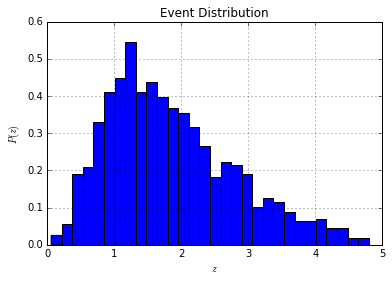

In [198]:
count, bins, ignored = plt.hist(z_fid, 30, normed=True)
#plt.plot(z, (0.6/np.amax(P))*P)
plt.grid(True)
plt.xlabel('$z$')
plt.ylabel('$P(z)$')
plt.title('Event Distribution')
plt.savefig('eventdistributionIM1.png')
plt.show()

In [199]:
dl = np.array([(1 + Z)*DC(Z) for Z in z_fid])
dl

array([ 0.05907302,  0.07776013,  0.23746867,  0.24818512,  0.30361766,
        0.30889468,  0.31160252,  0.36139092,  0.39375245,  0.40642621,
        0.42521814,  0.42810624,  0.46601304,  0.48490653,  0.50762927,
        0.50934589,  0.51187787,  0.51861764,  0.56162567,  0.56196586,
        0.5671629 ,  0.57830752,  0.57922031,  0.59061528,  0.60615719,
        0.60984625,  0.62097071,  0.62558744,  0.63183383,  0.63211957,
        0.64296219,  0.64465004,  0.64541533,  0.64730044,  0.67861466,
        0.68421299,  0.68663081,  0.70021748,  0.70539852,  0.70548615,
        0.71001916,  0.71539354,  0.71607245,  0.71849801,  0.72961631,
        0.74105734,  0.74146334,  0.76116903,  0.80184782,  0.80195807,
        0.80214279,  0.82515403,  0.83345657,  0.83999433,  0.84692285,
        0.85571087,  0.86767622,  0.87114681,  0.8714739 ,  0.87951725,
        0.88992286,  0.89856789,  0.89898575,  0.90789588,  0.91781834,
        0.92011879,  0.92412588,  0.9252223 ,  0.93143154,  0.93

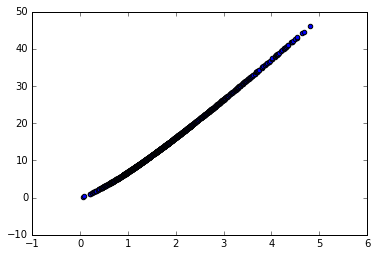

In [200]:
plt.scatter(z_fid, (h/3.)**(-1)*dl)
plt.show()

In [201]:
m = 5*np.log10((h/3000)**(-1)*dl)+25
m

array([37.08224418, 37.67908308, 40.10332978, 40.19917687, 40.63693334,
       40.67435036, 40.69330304, 41.01518438, 41.20141453, 41.27020675,
       41.36835711, 41.38305599, 41.56728854, 41.65358834, 41.75303149,
       41.76036222, 41.77112998, 41.79953464, 41.97253293, 41.97384785,
       41.99383728, 42.0360924 , 42.03951709, 42.08182158, 42.1382245 ,
       42.1514    , 42.19065377, 42.2067383 , 42.22831259, 42.22929437,
       42.26622538, 42.27191826, 42.2744946 , 42.28082772, 42.38341438,
       42.40125476, 42.40891462, 42.45146295, 42.46747091, 42.46774066,
       42.48164853, 42.49802327, 42.50008303, 42.50742605, 42.54077086,
       42.57455728, 42.57574662, 42.63270376, 42.74575795, 42.74605651,
       42.74655662, 42.80797332, 42.82971308, 42.84667997, 42.86451745,
       42.88693344, 42.91708666, 42.92575494, 42.92657012, 42.94652001,
       42.97206   , 42.99305267, 42.99406223, 43.01547842, 43.03908186,
       43.0445177 , 43.05395387, 43.05652866, 43.0710529 , 43.07

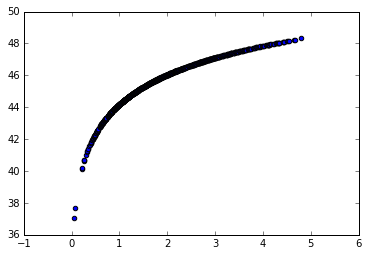

In [202]:
plt.scatter(z_fid, m)
plt.show()

In [203]:
q=0.03
N_BNS=(1/(1+q))*N
N_BHNS = N-int(N_BNS)
mass_1 =np.random.uniform(1,2, int(N_BNS))*M_solar
mass_2 = np.random.uniform(1,2, int(N_BNS))*M_solar
M_total1 = mass_1 + mass_2
eta1 =((mass_1*mass_2)/(M_total1**2))
M_chirp1 = M_total1*eta1**(3./5.)
#np.amax(mass_1/mass_2), np.amin(mass_1/mass_2)
mass_3 = np.random.uniform(1,2, N_BHNS)*M_solar
mass_4 = np.random.uniform(3,10, N_BHNS)*M_solar
M_total2 = mass_3+mass_4
eta2 =((mass_3*mass_4)/(M_total2**2))
M_chirp2 = M_total2*eta2**(3./5.)
M_total = np.concatenate((M_total1, M_total2), axis=None)
M_chirp = (1+z_fid)*np.concatenate((M_chirp1, M_chirp2), axis=None)
int(N_BNS)

970

In [204]:
phi_1 = np.random.uniform(0, 2*np.pi, N)
phi_2 = phi_1 + (2*np.pi/3.)
phi_3 = phi_1 + (4*np.pi/3.)

In [205]:
theta = np.random.uniform(0, np.pi, N)
psi = np.random.uniform(0, 2*np.pi, N)

In [206]:
F1_plus = (np.sqrt(3)/2)*(0.5*(1+np.cos(theta)**2)*np.cos(2*phi_1)*np.cos(2*psi)-np.cos(theta)*np.sin(2*phi_1)*np.sin(2*psi))


In [207]:

F1_times = (np.sqrt(3)/2)*(0.5*(1+np.cos(theta)**2)*np.cos(2*phi_1)*np.sin(2*psi)-np.cos(theta)*np.sin(2*phi_1)*np.cos(2*psi))


In [208]:
Amp_1 = (H0/dl)*np.sqrt(4*F1_plus**2+4*F1_plus**2)*np.sqrt(5*np.pi/96.)*np.pi**(-7./6.)*M_chirp**(5./6.)


In [209]:
# em Hz
f0 = 200
f_lower = 1.
M_obs = (1+z_fid)*M_total
f_LSO = (1./(6.**(3./2.)*2*np.pi*M_obs))
f_upper = 2*f_LSO
x_lower = f_lower/f0
x_upper = f_upper/f0

In [210]:

f = np.linspace(1,10**4, N)
x = f/f0

In [211]:
S0 = 1.449*10**(-52)
p1=-4.05
p2 = -0.69
a1 = 185.62
a2 = 232.56
b1=31.18
b2 = -64.72
b3 = 52.24
b4 = -42.16
b5 = 10.17
b6 = 11.53
c1 = 13.58
c2 = -36.46
c3 = 18.56
c4 = 27.43
def S_h(x):
    return S0*(x**p1 + a1*x**p2 + a2*((1+ b1*x + b2*x**2 + b3*x**3+b4*x**4 + b5*x**5 + b6*x**6)/(1 + c1*x + c2*x**2 + c3*x**3+c4*x**4)))
S_h(239)


8.097623759624806e-46

In [212]:

def h_1(x):
    return Amp_1*(f0*x)**(-7./6.)

In [213]:
rho_1 = np.zeros(len(Amp_1))
for i in range(len(Amp_1)):
    integ_H = lambda y: (4.*f0*(Amp_1[i]*(f0*y)**(-7./6.))**2)/(S_h(y))
    rho_1[i] = np.sqrt(quad(integ_H, x_lower, x_upper[i])[0])
   # print rho_H[i]
rho_1

array([4.32716483e+01, 1.72460023e+02, 4.24279892e+01, 1.83802633e+01,
       5.00420583e+01, 1.63771428e+01, 3.84979133e+01, 1.24144760e+01,
       2.75946290e+01, 2.23958972e+01, 3.41088832e+01, 2.50787608e+00,
       2.38846326e+01, 2.19344885e-01, 1.89878656e+01, 2.77571418e+00,
       3.29032167e+01, 3.30254069e+01, 1.20275315e+00, 1.26527027e+01,
       7.89575203e+00, 2.63471708e+01, 1.77352172e+01, 1.31700490e+01,
       2.87715880e+01, 4.78328660e+00, 4.95075773e+00, 2.52681471e+00,
       1.13359247e+01, 1.11738797e+00, 7.13749712e+00, 2.45353117e+01,
       1.54988397e+00, 1.27644430e+01, 1.23426951e+01, 1.87657814e+01,
       1.35769107e+01, 8.04679388e+00, 1.05049943e+01, 1.96370338e+01,
       6.20602200e+00, 2.68486765e+01, 1.80401968e+00, 1.20393036e+01,
       1.61700087e+01, 7.02159415e+00, 7.14790342e+00, 1.59887430e+01,
       1.87344993e+01, 3.76396131e+00, 7.80602012e+00, 1.03246635e+01,
       2.71291566e+01, 7.39029898e+00, 1.31707996e+01, 2.17678440e+01,
      

In [214]:
F2_plus = (np.sqrt(3)/2)*(0.5*(1+np.cos(theta)**2)*np.cos(2*phi_2)*np.cos(2*psi)-np.cos(theta)*np.sin(2*phi_2)*np.sin(2*psi))


In [215]:

F2_times = (np.sqrt(3)/2)*(0.5*(1+np.cos(theta)**2)*np.cos(2*phi_2)*np.sin(2*psi)-np.cos(theta)*np.sin(2*phi_2)*np.cos(2*psi))


In [216]:
Amp_2 = (H0/dl)*np.sqrt(4*F2_plus**2+4*F2_plus**2)*np.sqrt(5*np.pi/96.)*np.pi**(-7./6.)*M_chirp**(5./6.)


In [217]:
def h_2(x):
    return Amp_2*(f0*x)**(-7./6.)

In [218]:
rho_2 = np.zeros(len(Amp_2))
for i in range(len(Amp_2)):
    integ_2 = lambda y: (4.*f0*(Amp_2[i]*(f0*y)**(-7./6.))**2)/(S_h(y))
    rho_2[i] = np.sqrt(quad(integ_2, x_lower, x_upper[i])[0])
   # print rho_H[i]
rho_2

array([1.44126083e+02, 2.28698776e+01, 1.87392990e+01, 4.68357977e+01,
       1.44228279e+01, 2.11465514e+01, 4.03605376e+01, 1.57407352e+01,
       1.16643767e+00, 3.60648070e+01, 4.75237806e+00, 1.86313205e+01,
       1.67343174e+01, 2.94549948e+01, 2.81932213e+01, 1.93683684e+01,
       3.52493628e+01, 2.92387199e+01, 1.54311018e+01, 8.61295804e+00,
       1.91615263e+01, 2.95800272e+01, 4.62316155e+00, 3.51827340e+01,
       1.13468053e+01, 7.28726141e+00, 6.57075716e+00, 4.19404092e+00,
       6.87787956e+00, 3.37709273e+00, 6.98815256e+00, 9.68001916e+00,
       1.23146023e+01, 1.89261702e+00, 3.80113965e+00, 4.62387995e+00,
       5.55468958e+00, 4.53146785e+00, 4.69863839e+00, 1.27193717e+00,
       1.51077080e+01, 1.86822813e+01, 2.34232412e+01, 2.77363473e+00,
       1.18792654e+01, 2.56995652e+00, 3.49914431e+00, 1.77442668e+01,
       1.73396180e+01, 1.96709957e+01, 3.18398845e+00, 7.77007320e+00,
       2.21725121e+01, 1.63938176e+01, 5.35179986e+00, 8.35981125e+00,
      

In [219]:
F3_plus = (np.sqrt(3)/2)*(0.5*(1+np.cos(theta)**2)*np.cos(2*phi_3)*np.cos(2*psi)-np.cos(theta)*np.sin(2*phi_3)*np.sin(2*psi))


In [220]:
F3_times = (np.sqrt(3)/2)*(0.5*(1+np.cos(theta)**2)*np.cos(2*phi_3)*np.sin(2*psi)-np.cos(theta)*np.sin(2*phi_3)*np.cos(2*psi))


In [221]:
Amp_3 = (H0/dl)*np.sqrt(4*F3_plus**2+4*F3_plus**2)*np.sqrt(5*np.pi/96.)*np.pi**(-7./6.)*M_chirp**(5./6.)

In [222]:
def h_3(x):
    return Amp_3*(f0*x)**(-7./6.)

In [223]:
rho_3 = np.zeros(len(Amp_3))
for i in range(len(Amp_3)):
    integ_3 = lambda y: (4.*f0*(Amp_3[i]*(f0*y)**(-7./6.))**2)/(S_h(y))
    rho_3[i] = np.sqrt(quad(integ_3, x_lower, x_upper[i])[0])
   # print rho_H[i]
rho_3

array([1.87397731e+02, 1.95329901e+02, 2.36886901e+01, 2.84555344e+01,
       3.56192304e+01, 4.76940857e+00, 1.86262435e+00, 3.32625918e+00,
       2.87610667e+01, 1.36689098e+01, 3.88612613e+01, 1.61234444e+01,
       4.06189500e+01, 2.92356499e+01, 9.20535570e+00, 1.65926542e+01,
       2.34614606e+00, 3.78668698e+00, 1.42283487e+01, 2.12656608e+01,
       1.12657743e+01, 3.23285645e+00, 2.23583787e+01, 2.20126850e+01,
       1.74247828e+01, 2.50397481e+00, 1.15215149e+01, 6.72085564e+00,
       4.45804518e+00, 2.25970476e+00, 1.41256497e+01, 1.48552926e+01,
       1.07647183e+01, 1.46570600e+01, 1.61438347e+01, 2.33896614e+01,
       8.02222110e+00, 1.25782617e+01, 1.52036327e+01, 1.83650966e+01,
       8.90168598e+00, 8.16639519e+00, 2.52272609e+01, 9.26566890e+00,
       4.29074324e+00, 9.59155067e+00, 1.06470477e+01, 1.75552380e+00,
       1.39488134e+00, 1.59070344e+01, 1.09900086e+01, 2.55459030e+00,
       4.95664453e+00, 9.00351865e+00, 7.81899970e+00, 1.34080327e+01,
      

In [224]:
rho_tot = np.sqrt(rho_1**2+rho_2**2+rho_3**2)
rho_tot[rho_tot < 8.0] = np.random.uniform(8., 20.)
rho_tot

array([240.33866295, 261.57075746,  52.08118311,  57.80262502,
        63.09481066,  27.16863453,  55.80798953,  20.32126861,
        39.87509352,  44.59916598,  51.92493276,  24.76652989,
        50.00412131,  41.50142234,  35.2155554 ,  25.6545212 ,
        48.27674027,  44.27097515,  21.02406776,  26.20118817,
        23.58865537,  39.74421693,  28.91035545,  43.54116744,
        35.49897634,   9.06939356,  14.15733581,   8.31532755,
        13.98865911,  10.81016089,  17.3006393 ,  30.27150494,
        16.42956875,  19.5279905 ,  20.6739978 ,  30.3415734 ,
        16.71954279,  15.60441479,  19.0678409 ,  26.9166806 ,
        18.60100973,  33.71304009,  34.47198002,  15.44313768,
        20.51820179,  12.16163251,  13.29271076,  23.94954637,
        25.56539675,  25.57634098,  13.8510657 ,  13.17188846,
        35.38615206,  20.11062215,  16.22493387,  26.89797052,
        28.64461976,  24.53612625,  17.19905353,  24.89085036,
        31.50433182,  32.9570844 ,  21.58300536,  27.13

In [225]:
sigma_dl = np.sqrt(((2*dl)/rho_tot)**2 +(0.05*z_fid*dl)**2)
np.amax(sigma_dl), np.amin(sigma_dl)

(3.1637455278158524, 0.0005191889905701806)

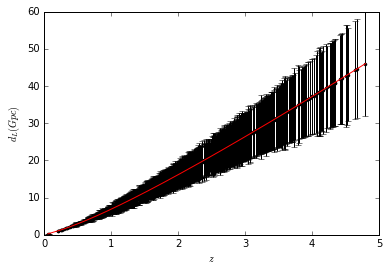

In [226]:
plt.errorbar(z_fid, (h/3.)**(-1)*dl, (h/3.)**(-1)*sigma_dl,  fmt=".k")
plt.plot(z_fid, (h/3)**(-1)*dl, 'r')
plt.xlabel('$z$')
plt.ylabel('$d_L(Gpc)$')
#plt.ylim((0,100))
plt.show()

In [227]:
m_err = (5./np.log(10))*(sigma_dl/dl)
np.amax(m_err), np.amin(m_err)

(0.6955347036891943, 0.01842304482285982)

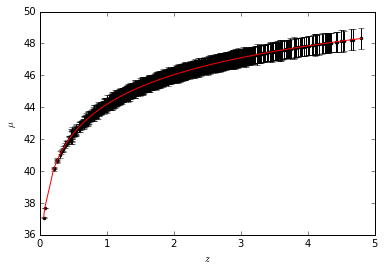

In [228]:
plt.errorbar(z_fid, m, m_err, fmt='.k')
plt.plot(z_fid, m, 'r')
plt.xlabel('$z$')
plt.ylabel('$\mu$')
plt.show()

In [229]:
dl_fid = np.sqrt((np.random.normal(dl, sigma_dl))**2)
#dl = np.array([(1 + Z)*DC(Z) for Z in z_eff]) + np.random.normal(0, sigma_dl, N)
np.amin(dl_fid), np.amax(dl_fid)

(0.058941132620067754, 13.918579071679083)

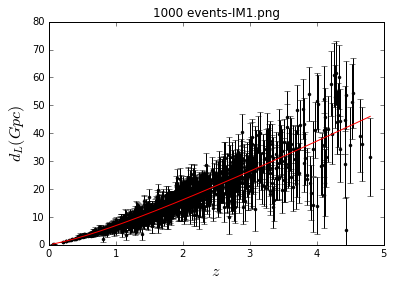

In [230]:
plt.errorbar(z_fid, (h/3.)**(-1)*dl_fid, (h/3.)**(-1)*sigma_dl,  fmt=".k")
plt.plot(z_fid,(h/3.)**(-1)*dl, 'r' )
plt.xlabel('$z$', fontsize=16)
plt.ylabel('$d_L(Gpc)$', fontsize=16)
#plt.savefig('dL(z)-1000vents_IM1')
plt.ylim((0,80))
plt.title('1000 events-IM1.png')
plt.show()

In [231]:
m_fid = np.random.normal(m, m_err, N)
#mu = 5*np.log10((h/3000)**(-1)*dl)+25
np.amax(m_fid), np.amin(m_fid)
#len(mu_fid)/

(49.32120520001475, 37.08691888055247)

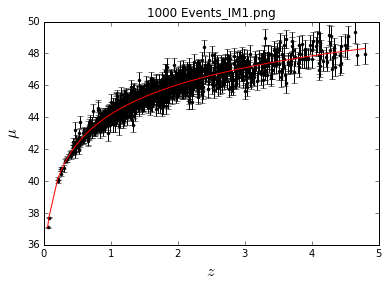

In [232]:
plt.errorbar(z_fid, m_fid, m_err, fmt='.k')
plt.plot(z_fid, m, 'r')
plt.xlabel('$z$', fontsize=16)
plt.ylabel('$\mu$', fontsize=16)
#plt.savefig('mu(z)-1000Events-IM1')
#plt.ylim((40,55))
plt.title('1000 Events_IM1.png')
plt.show()


In [434]:
#definir likelihood
c=3.e5
def lnlike(theta, z_fid, m_fid, m_err):
    Om_m, H_0, w, lamb = theta
    def DL(zz, Om_m, H_0, w, lamb):

        E = lambda zz :  np.sqrt((w/(w+lamb)*Om_m)*(1+zz)**(3*(1-lamb)) + (1-(w/(w+lamb))*Om_m)*(1+zz)**(3*(1+w)) )**(-1)
        result = quad(E, 0, zz)[0]
        return result

    dl = (c/H_0)*np.array([(1 + Z) * DL(Z, Om_m, H_0, w, lamb) for Z in z_fid])
    

    mu = 5*np.log10(dl)+25
    
    result = -0.5 * np.sum((m_fid-mu)**2/m_err**2)
    # print result 
    return result


In [435]:
#priors

def lnprior(theta):
    Om_m, H_0, w, lamb = theta
    if 0.0 <= Om_m <= 1.0  and 20.0 <= H_0 <= 100.0 and -2.5 <= w <= -1.01 and -0.3 <= lamb <= 0.3:
        return 0.0
    return -np.inf


In [436]:
#posterior

def lnprob(theta, z_fid, m_fid, m_err):
    lp = lnprior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(theta, z_fid, m_fid, m_err)

In [437]:
#cadeia de Markov

set_ini = 0.3, 70.0, -1.01, 0.1 

ndim, nwalkers = 4, 16
pos = [set_ini + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]


sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(z_fid, m_fid, m_err))
sampler.run_mcmc(pos, 1000,progress=True)

samples = sampler.chain[:, 500:, :].reshape((-1, ndim))

np.savetxt("chainInt1_900events.txt",samples)

100%|██████████| 1000/1000 [31:44<00:00,  2.09s/it]


In [438]:
Om_m_mcmc, H_0_mcmc, w_mcmc, lamb_mcmc = map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]),
                             zip(*np.percentile(samples, [16, 50, 84],
                                                axis=0)))

In [439]:
Om_m_mcmc, H_0_mcmc, w_mcmc, lamb_mcmc

((0.4595960822007945, 0.0777668016164379, 0.07727648995224828),
 (67.75393564579197, 1.9337268766353048, 1.451855859805633),
 (-1.7493312125634106, 0.49081218047464836, 0.4527645101149189),
 (0.12863749805805907, 0.053870516345268876, 0.07278156716630496))

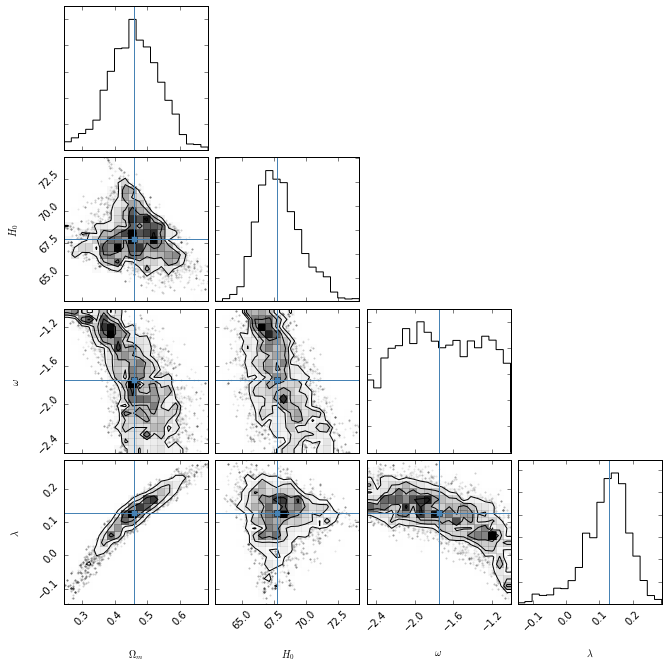

In [440]:
fig = corner.corner(samples, labels=["$\Omega_m$", "$H_0$", "$\omega$", "$\lambda$"],
                    truths=[Om_m_mcmc[0], H_0_mcmc[0], w_mcmc[0], lamb_mcmc[0]])
fig.savefig("ParametersIm1_900.png")
fig.show()

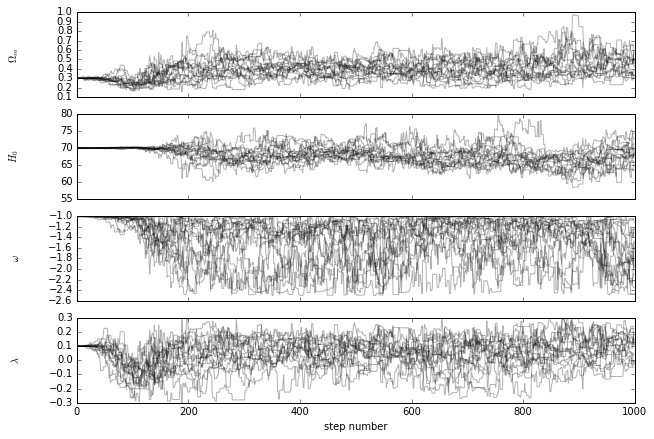

In [377]:
fig, axes = plt.subplots(4, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["$\Omega_m$", "$H_0$", "$\omega$", "$\lambda$"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

In [124]:
tau = sampler.get_autocorr_time()
print(tau)

AutocorrError: The chain is shorter than 50 times the integrated autocorrelation time for 4 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 20;
tau: [83.91449167 79.7692092  59.2460965  58.05360145]

In [125]:
50*83.91449167, 50*52.11836245, 50*64.27515118, 50*54.3225512

(4195.7245835, 2605.9181224999998, 3213.7575589999997, 2716.12756)

In [233]:
np.savetxt('SS_1000.txt', np.transpose([z_fid, m_fid, m_err]))

In [178]:
np.savetxt('zfid.txt', (z_fid, m_fid), delimiter=',')